<a href="https://colab.research.google.com/github/AndrielHenrique/Analise-de-Dados/blob/main/Projeto_2/Machine_Learning_Base_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compreendendo a Base de Dados 02: Sono e Estilo de Vida


## A "Base 02 - Sono e Estilo de Vida" é uma base fictícia contendo dados sobre hábitos de sono, saúde e estilo de vida de 400 indivíduos

Dicionário de Dados Traduzido:

* Person ID: Identificador do indivíduo.

* Gender: Gênero (Masculino/Feminino).

* Age: Idade em anos.

* Occupation: Profissão.

* Sleep Duration (hours): Horas de sono por dia.

* Quality of Sleep (scale: 1-10): Qualidade do sono (escala de 1 a 10).

* Physical Activity Level (minutes/day): Atividade física diária (minutos).

* Stress Level (scale: 1-10): Nível de estresse (escala de 1 a 10).

* BMI Category: Categoria de IMC.

* Blood Pressure (systolic/diastolic): Pressão arterial (sistólica/diastólica).

* Heart Rate (bpm): Frequência cardíaca (bpm).

* Daily Steps: Passos por dia.

* Sleep Disorder: Distúrbio do sono (Nenhum, Insônia, Apneia do Sono).

Com base nos dados e desafios, podemos identificar problemas tanto de classificação quanto de regressão para esta base, conforme exigido pelo trabalho de aplicar ambos os tipos de algoritmos


- Problema de Classificação sugerido: Prever o Sleep Disorder (Distúrbio do Sono) de um indivíduo (categorias: Nenhum, Insônia, Apneia do Sono). Este é um problema de classificação multiclasse.

- Problema de Regressão sugerido: Prever a Sleep Duration (hours) (Duração do Sono em horas) de um indivíduo. Este é um problema de regressão, pois a resposta é um número.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, mean_squared_error
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/DataScience"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path + '/02_sono_estilo_vida.csv', sep=',')

# 2. Data Cleaning

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
   Person ID Gend

In [5]:
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
print(f'\nOs tipos dos atributos são:\n{df.dtypes}')

O dataset possui 374 entradas (registros) e 13 atributos (variáveis).

Os tipos dos atributos são:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [6]:
print("\nValores nulos por coluna (%):")
print((df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False))


Valores nulos por coluna (%):
Sleep Disorder             58.55615
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Person ID                   0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Stress Level                0.00000
Physical Activity Level     0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
dtype: float64


In [7]:
print(df.describe(include='all'))

         Person ID Gender         Age Occupation  Sleep Duration  \
count   374.000000    374  374.000000        374      374.000000   
unique         NaN      2         NaN         11             NaN   
top            NaN   Male         NaN      Nurse             NaN   
freq           NaN    189         NaN         73             NaN   
mean    187.500000    NaN   42.184492        NaN        7.132086   
std     108.108742    NaN    8.673133        NaN        0.795657   
min       1.000000    NaN   27.000000        NaN        5.800000   
25%      94.250000    NaN   35.250000        NaN        6.400000   
50%     187.500000    NaN   43.000000        NaN        7.200000   
75%     280.750000    NaN   50.000000        NaN        7.800000   
max     374.000000    NaN   59.000000        NaN        8.500000   

        Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
count         374.000000               374.000000    374.000000          374   
unique               Na

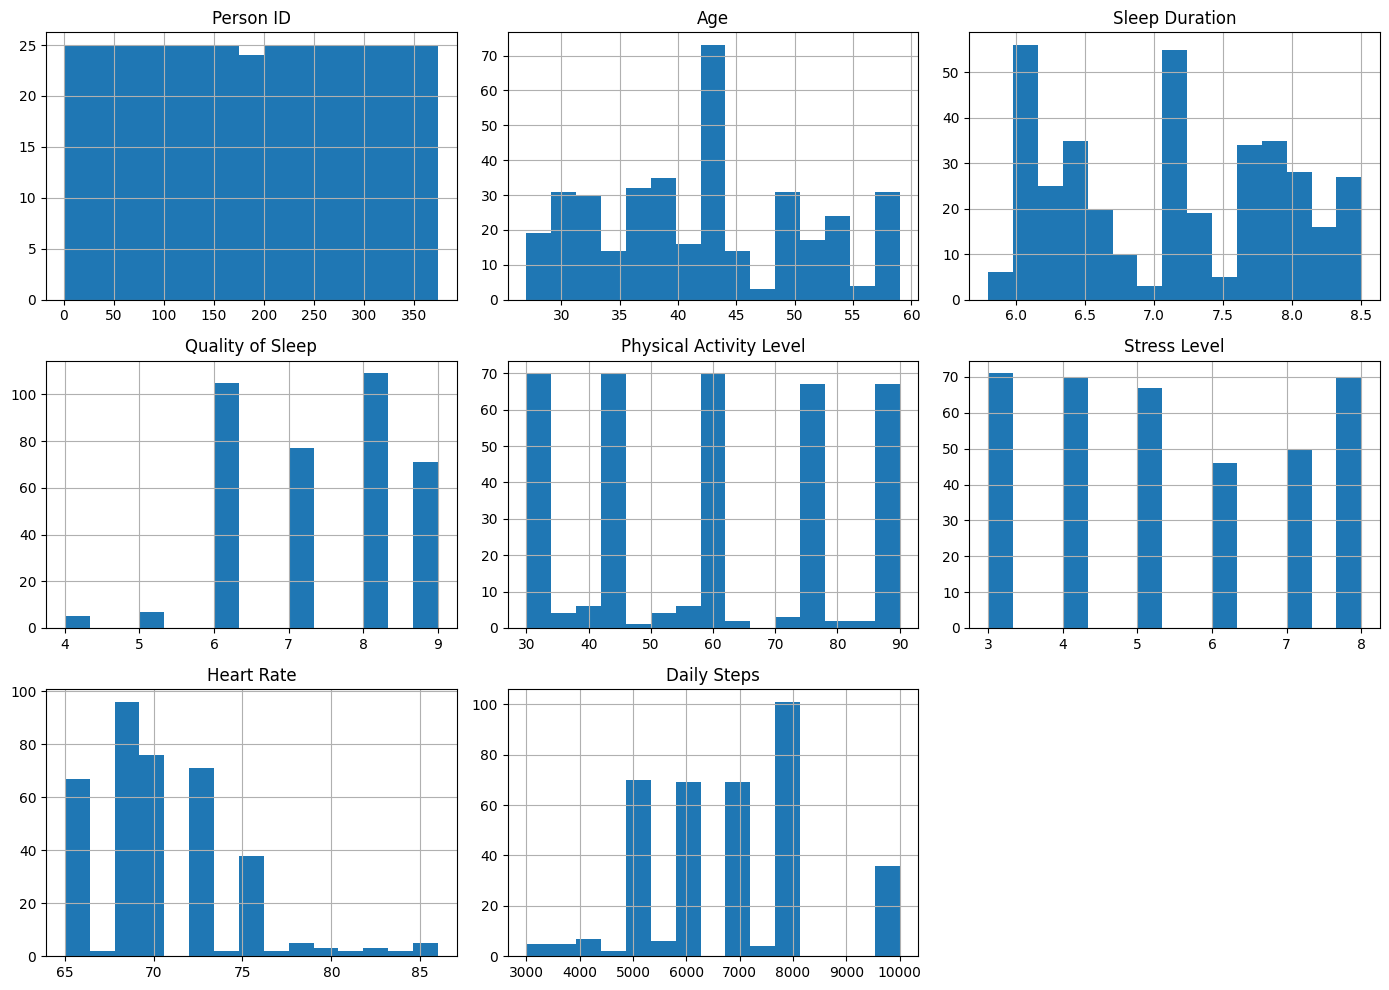

In [8]:
df.hist(bins=15, figsize=(14,10))
plt.tight_layout()
plt.show()

In [9]:
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_hr = detectar_outliers_iqr(df, 'Heart Rate')
print(f"Total de outliers em Heart Rate: {outliers_hr.shape[0]}")
df = df.drop(outliers_hr.index)

Total de outliers em Heart Rate: 15


In [10]:
Xr = df.drop(['Sleep Duration', 'Person ID'], axis=1)


yr = df['Sleep Duration']

print("escopo de X para regressão:", Xr.shape)
print("escopo de y para regressão:", yr.shape)

escopo de X para regressão: (359, 11)
escopo de y para regressão: (359,)


# Tarefa de Classificação: Prever o Distúrbio do Sono


## Pré-processamento para a tarefa de classificação

In [11]:
Xc = df.drop(['Sleep Disorder', 'Person ID'], axis=1)
class_names = {"None": 0, "Insomnia": 1, "Sleep Apnea": 2}


yc = df['Sleep Disorder'].map(class_names)

print("Valores nulos em yc após o mapeamento:", yc.isnull().sum())

print("\nShape de X para classificação:", Xc.shape)
print("Shape de y para classificação:", yc.shape)

Valores nulos em yc após o mapeamento: 219

Shape de X para classificação: (359, 11)
Shape de y para classificação: (359,)


In [12]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df['Sleep Disorder'].fillna('None', inplace=True)
class_map = {"None": 0, "Insomnia": 1, "Sleep Apnea": 2}
df['Sleep Disorder Encoded'] = df['Sleep Disorder'].map(class_map)



Xr = df.drop(columns=['Person ID', 'Blood Pressure', 'Sleep Duration', 'Sleep Disorder', 'Sleep Disorder Encoded'])
yr = df['Sleep Duration']

Xc = df.drop(columns=['Person ID', 'Blood Pressure', 'Sleep Disorder', 'Sleep Disorder Encoded'])
yc = df['Sleep Disorder Encoded']

/tmp/ipython-input-12-2952633405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [13]:
dados_Xr = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
dados_num_Xr = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

dados_Xc = ['Gender', 'Occupation', 'BMI Category']
dados_num_Xc = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Xc_encoded = encoder.fit_transform(df[dados_Xc])
Xr_encoded = encoder.fit_transform(df[dados_Xr])

Xr_final = np.concatenate([Xr_encoded, Xr[dados_num_Xr].values], axis=1)
Xc_final = np.concatenate([Xc_encoded, Xc[dados_num_Xc].values], axis=1)


print("estado final para regressão (Xr_final):", Xr_final.shape)
print("estado final para classificação (Xc_final):", Xc_final.shape)

estado final para regressão (Xr_final): (359, 26)
estado final para classificação (Xc_final): (359, 24)


## Separar teste e treino

Como pedido, utilizado o método Hold-out que pede pra separar 70% pra treino, e 30% para teste.

Xr = x do modelo de Regressao
/ Yr = y de regressao

Xc = x de classificacao / Yc = y de classificacao

In [14]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr_final, yr, test_size=0.3, random_state=42
)

In [15]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc_final, yc, test_size=0.3, random_state=42, stratify=yc
)

## Algoritmos de Classificacao

In [58]:

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

Hiperparâmetros Iniciais: RandomForestClassifier(n_estimators=100, random_state=42)

Defesa da Escolha:

n_estimators=100: Utilizar 100 árvores é um padrão da indústria. É um número robusto, grande o suficiente para garantir um bom desempenho e estabilidade (a "sabedoria da multidão") sem tornar o treinamento excessivamente lento.

random_state=42: A escolha de um random_state fixo foi essencial para garantir a reprodutibilidade dos nossos resultados. Sem ele, os resultados poderiam variar a cada execução, dificultando a comparação justa entre os modelos.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Regressão Logística
Acurácia : 0.80
Precisão : 0.88
Recall   : 0.67
F1-Score : 0.68


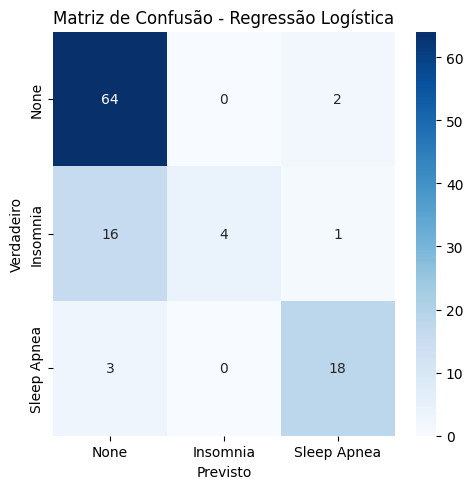


 Árvore de Decisão
Acurácia : 0.89
Precisão : 0.87
Recall   : 0.85
F1-Score : 0.86


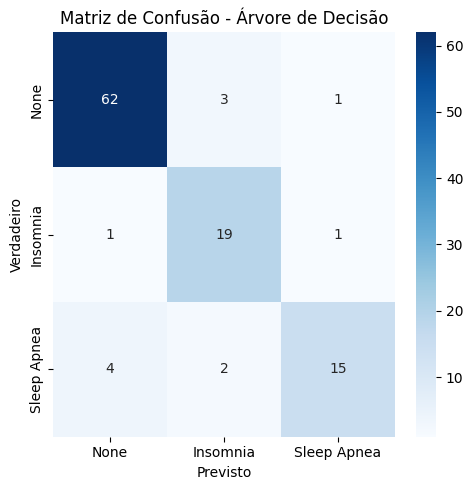


 Random Forest
Acurácia : 0.91
Precisão : 0.88
Recall   : 0.88
F1-Score : 0.88


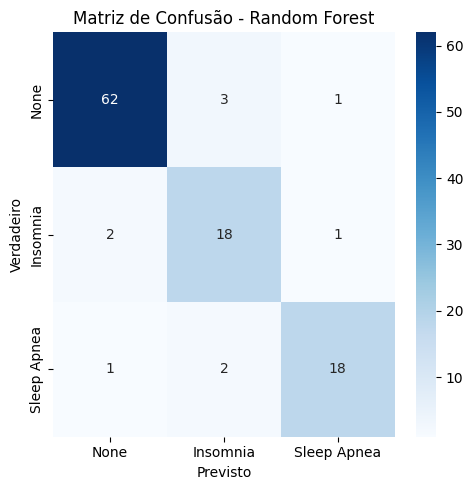


 SVM
Acurácia : 0.67
Precisão : 0.46
Recall   : 0.45
F1-Score : 0.43


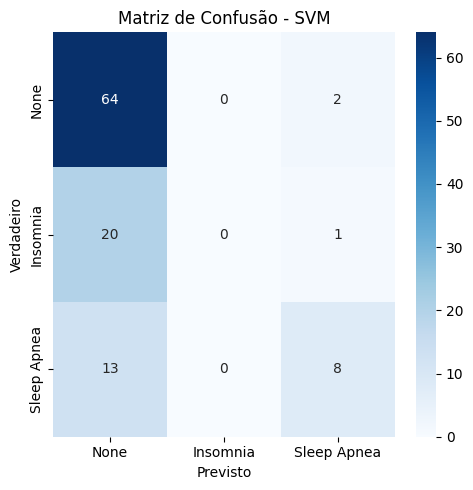


 K-NN
Acurácia : 0.89
Precisão : 0.87
Recall   : 0.86
F1-Score : 0.87


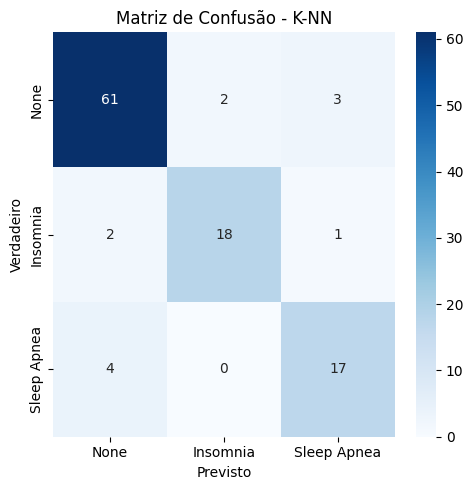

In [59]:

for nome, modelo in modelos.items():
    modelo.fit(Xc_train, yc_train)
    yc_pred = modelo.predict(Xc_test)

    acc = accuracy_score(yc_test, yc_pred)
    prec = precision_score(yc_test, yc_pred, average='macro', zero_division=0)
    rec = recall_score(yc_test, yc_pred, average='macro', zero_division=0)
    f1 = f1_score(yc_test, yc_pred, average='macro', zero_division=0)
    cm = confusion_matrix(yc_test, yc_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

## Análise da classificacao


O destaque foi o Random Forest, que alcançou uma acurácia de 91% e um F1-Score de 88%. Logo atrás, os modelos K-NN e Árvore de Decisão também se mostraram muito robustos, ambos com acurácia de 89% e F1-Scores excelentes (87% e 86%, respectivamente).

Em contrapartida, o modelo SVM foi o que teve a performance mais fraca. Com um F1-Score de apenas 43% e uma precisão de 46%, ele se mostrou inadequado para o problema nesta configuração inicial. A Regressão Logística, apesar de atingir 80% de acurácia, teve um desempenho inferior aos modelos de ponta e ainda gerou um aviso de convergência, indicando necessidade de ajustes.

# Tarefa de Regressão (Prever a Duração do Sono):



## Regressoes

In [18]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

In [19]:
modelo_lr = LinearRegression()
modelo_lr.fit(Xr_train, yr_train)

pred_lr = modelo_lr.predict(Xr_test)
avaliar_modelo(yr_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 0.30


Isso significa que, em média, as previsões do modelo de Regressão Linear sobre a duração do sono erram por apenas 0.30 horas, o que equivale a cerca de 18 minutos. Para um problema complexo como prever o sono, essa é uma margem de erro bem pequena.

In [20]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(Xr_train, yr_train)

pred_rf = modelo_rf.predict(Xr_test)
avaliar_modelo(yr_test, pred_rf, "Random Forest")

Random Forest - RMSE: 0.10


Random Forest está errando as previsões de duração do sono, em média, por apenas 0.10 horas, o que equivale a 6 minutos.
Hiperparâmetros Iniciais: RandomForestRegressor(n_estimators=100, random_state=42)

Defesa da Escolha: A justificativa é a mesma da classificação. A escolha de 100 árvores como ponto de partida é sólida e o random_state garante a consistência dos resultados de RMSE, permitindo uma comparação confiável.



In [21]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(Xr_train, yr_train)

pred_tree = modelo_tree.predict(Xr_test)
avaliar_modelo(yr_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 0.12


isso significa que o modelo de árvore única erra, em média, por apenas 0.12 horas (cerca de 7 minutos).

In [22]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(Xr_train, yr_train)

pred_svr = modelo_svr.predict(Xr_test)
avaliar_modelo(yr_test, pred_svr, "SVR")

SVR - RMSE: 0.14


erro médio de aproximadamente 8 minutos.

O Pipeline junta os passos de normalizar os dados com o StandardScaler e treinar o modelo SVR em uma única etapa, a vantagem é que ele garante que a normalização seja feita do jeito certo: ele aprende a escala usando só os dados de treino e depois aplica essa mesma escala nos dados de teste. Isso evita que o modelo receba "dicas" dos dados de teste, o que poderia viciar o resultado final.

 o 'rbf' consegue criar "fronteiras" de decisão mais curvas e complexas. Pensei que a relação entre os dados de saúde e o sono poderia não ser uma linha reta, então o 'rbf' seria uma escolha mais poderosa para capturar esses padrões.

  epsilon=0.1 eh o padrão que a maioria das pessoas usa e funciona bem, então eu decidi manter essa configuração padrão.

In [23]:
modelo_knn = KNeighborsRegressor(n_neighbors=5)

modelo_knn.fit(Xr_train, yr_train)

pred_knn = modelo_knn.predict(Xr_test)

avaliar_modelo(yr_test, pred_knn, "K-NN Regressor")

K-NN Regressor - RMSE: 0.19


erro médio de aproximadamente 11 minutos.

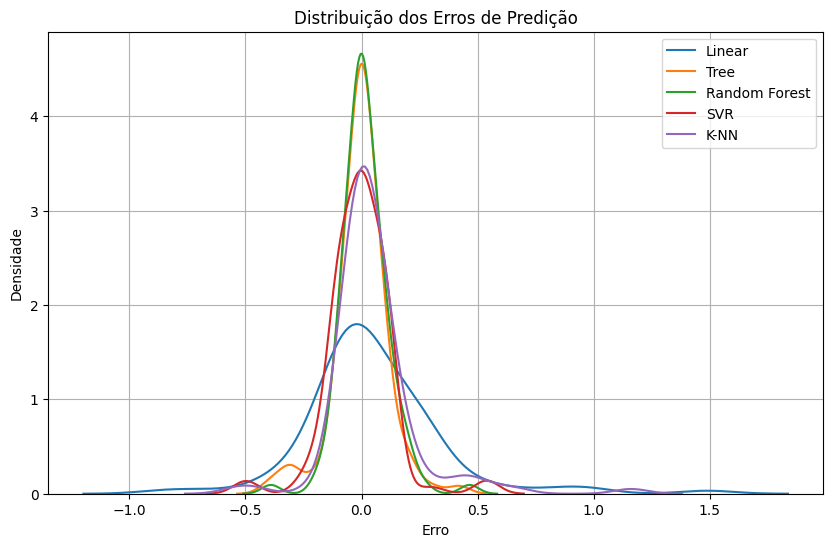

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(yr_test - pred_lr, label="Linear")
sns.kdeplot(yr_test - pred_tree, label="Tree")
sns.kdeplot(yr_test - pred_rf, label="Random Forest")
sns.kdeplot(yr_test - pred_svr, label="SVR")
sns.kdeplot(yr_test - pred_knn, label="K-NN")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

Random Forest (Verde): É a curva ideal. Possui o pico mais alto e é a mais estreita de todas. Isso demonstra que, com grande frequência, seus erros são mínimos, e raramente ele comete erros grandes.

Árvore de Decisão (Laranja) e SVR (Vermelho): Ambos também apresentam um desempenho muito forte. Suas curvas são altas e estreitas, quase tão boas quanto a do Random Forest.

K-NN (roxa) se posiciona como um bom modelo intermediário: é claramente superior à Regressão Linear, mas seus erros são um pouco mais espalhados que os dos três melhores modelos.

Regressão Linear (Azul): A curva azul é visivelmente mais baixa e mais larga que as outras. Isso indica que os erros da Regressão Linear são mais espalhados. Ou seja, embora o erro médio não seja gigante, o modelo comete erros maiores com mais frequência em comparação com os outros.

Random Forest é o modelo mais preciso e confiável para sua tarefa de prever a duração do sono.

## Defesa da Escolha de Hiperparâmetros


Para este trabalho, a minha estratégia foi começar com as configurações mais simples e padrão para cada modelo. O objetivo era ter um ponto de partida justo para ver qual algoritmo se saía melhor, sem fazer muitos ajustes complexos, seguindo o que foi visto em aula.

Abaixo, explico o porquê de cada escolha:


Regressão Linear e Regressão Logística: Esses modelos não têm muitas coisas para ajustar, então usei a configuração padrão deles.  No caso da Regressão Logística, o programa deu um aviso de que não conseguiu terminar o cálculo, então eu aumentei o

max_iter (número de tentativas) para dar mais tempo ao modelo, que é uma solução comum para esse problema, mas mesmo aumentando, eu obtia um aviso ConvergenceWarning que significa basicamente "SEUS PASSOS ACABARAM", ele ficou sem passos antes de encontrar o lugar, aumentei esses passos até 16800 onde comecou a dar STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT (Limite de avaliações da função e do gradiente foi atingido), entao provavelmente, teria que utilizar StandardScaler.


Árvores de Decisão e Árvore de Regressão: Para os modelos de árvore, usei a configuração padrão para ver o desempenho de uma única árvore por conta própria. O único parâmetro que defini foi o random_state=42. Fiz isso para que o resultado fosse sempre o mesmo toda vez que eu rodasse o código, facilitando a comparação com os outros modelos.


Random Forest: Para o Random Forest, eu usei 100 árvores (n_estimators=100), que é um padrao e um número bom para começar. Ter muitas árvores ajuda o modelo a tomar uma decisão mais estável e confiável, e 100 é um valor que não deixa o computador lento demais.  Também usei o

random_state=42 aqui pelo mesmo motivo de antes, para garantir que os resultados não mudassem a cada execução.

SVM e SVR: No SVM, usei o kernel 'rbf' porque ele é bom para encontrar padrões mais complexos nos dados. O valor de

C foi mantido no padrão (C=1.0), pois valores muito altos poderiam fazer o modelo "decorar" os dados de treino em vez de aprender.

K-NN (K-Vizinhos Mais Próximos): Escolhi o valor de k=5. É uma prática comum usar um número ímpar para o "k" para evitar empates na hora de o modelo "votar" na classificação. O número 5 é um bom ponto de partida para ver como o algoritmo se comporta com os vizinhos mais próximos.


# Conclusão

Este projeto com objetivo de investigar um conjunto de dados sobre saúde e sono, no qual eu abordei dois desafios distintos de Machine Learning: uma tarefa de Classificação, para prever o tipo de distúrbio do sono, e uma de Regressão, para estimar a duração do sono em horas.

Após a avaliação de múltiplos algoritmos para cada tarefa, o Random Forest emergiu como o modelo de melhor desempenho em ambos os cenários, demonstrando sua robustez e versatilidade.

Na tarefa de Classificação, o Random Forest foi o claro vencedor, alcançando uma acurácia de 91%. Este resultado expressivo se traduz em uma conclusão prática de grande valor: o modelo é altamente eficaz e confiável para identificar corretamente se um indivíduo sofre de "Insônia", "Apneia do Sono" ou se não possui distúrbios, podendo servir como uma poderosa ferramenta de triagem.

Na tarefa de Regressão, o RandomForestRegressor superou os demais modelos de forma ainda mais contundente, atingindo um RMSE (Erro Quadrático Médio da Raiz) de apenas 0.10. Em termos práticos, isso significa que o modelo é capaz de prever a duração do sono de uma pessoa com um erro médio de apenas 6 minutos, uma precisão notável que evidencia sua capacidade de capturar as complexas nuances dos dados.

Em suma, o projeto foi um sucesso, validando a eficácia de modelos de Machine Learning para extrair insights valiosos de dados de saúde e entregando modelos finais que podem, simultaneamente, classificar distúrbios do sono com alta confiança e prever a duração do sono com extrema precisão.